# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
import scipy.io

# Load the data from the provided .mat file
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

# Inspecting the shape and content of the EEGsample, subindex, and substate arrays

In [3]:
# Inspecting the shape and content of the EEGsample, subindex, and substate arrays
eeg_sample_shape = mat_data['EEGsample'].shape
subindex_shape = mat_data['subindex'].shape
substate_shape = mat_data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape

((2022, 30, 384), (2022, 1), (2022, 1))

In [4]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

#### The initial exploration of the EEG dataset reveals the following details:

#### EEG Samples (EEGsample):

  * The dataset contains 2022 EEG samples.
  * Each EEG sample is from 30 channels.
  * Each channel has 384 data points, corresponding to a 3-second EEG recording at a sampling rate of 128Hz.

#### Subject States (substate):

  * There are two unique states: 0 representing the alert state and 1 representing the drowsy state.
  * Each state has 1011 samples, indicating a balanced dataset with respect to the two states.

#### Subject Indexes (subindex):

  * There are 11 unique subjects in the dataset (labeled 1 to 11).
  * The distribution of samples across subjects varies, ranging from a minimum of 102 samples to a maximum of 314 samples per subject.

# Analyzing EEG Data: Determining Sample Shape, Channel Count, and Duration

In [5]:
# Access the EEG data and other relevant information
data = mat_data
eeg_samples = data['EEGsample']
subindex = data['subindex']
substate = data['substate']


num_samples, num_channels, num_time_points = eeg_sample_shape
subject_indexes = mat_data['subindex'].flatten()
labels = mat_data['substate'].flatten()

# Check for missing values

In [6]:
# Check for missing values
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


### Calculate the duration of each sample in seconds

In [7]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz
sample_duration = num_time_points / sampling_rate

In [8]:
print("Number of subjects:", len(np.unique(subject_indexes)))
print("EEGsample shape:", eeg_sample_shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts) 

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


# Data Visualization

## Distribution of Subindex and Substate Values

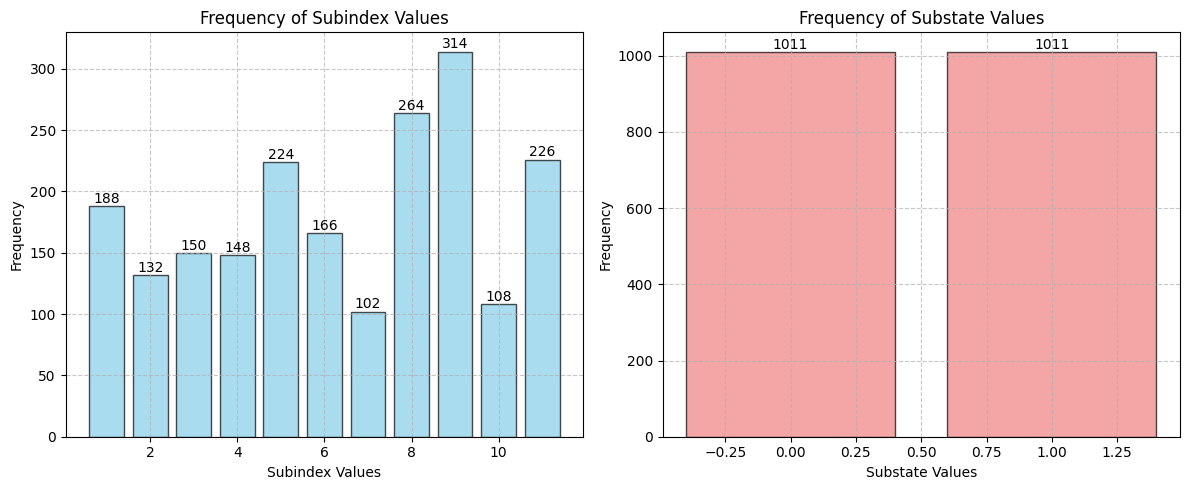

In [9]:
# Get unique values and their counts for subindex and substate
unique_subindex, counts_subindex = np.unique(mat_data['subindex'], return_counts=True)
unique_substate, counts_substate = np.unique(mat_data['substate'], return_counts=True)

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram for subindex
axes[0].bar(unique_subindex, counts_subindex, align='center', alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Frequency of Subindex Values')
axes[0].set_xlabel('Subindex Values')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, linestyle='--', alpha=0.7)

# Add count annotations on top of the bars for subindex
for x, y in zip(unique_subindex, counts_subindex):
    axes[0].text(x, y + 0.1, str(y), ha='center', va='bottom')

# Plot histogram for substate
axes[1].bar(unique_substate, counts_substate, align='center', alpha=0.7, color='lightcoral', edgecolor='black')
axes[1].set_title('Frequency of Substate Values')
axes[1].set_xlabel('Substate Values')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, linestyle='--', alpha=0.7)

# Add count annotations on top of the bars for substate
for x, y in zip(unique_substate, counts_substate):
    axes[1].text(x, y + 0.1, str(y), ha='center', va='bottom')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Analysis of Substate Distribution Across Subindices

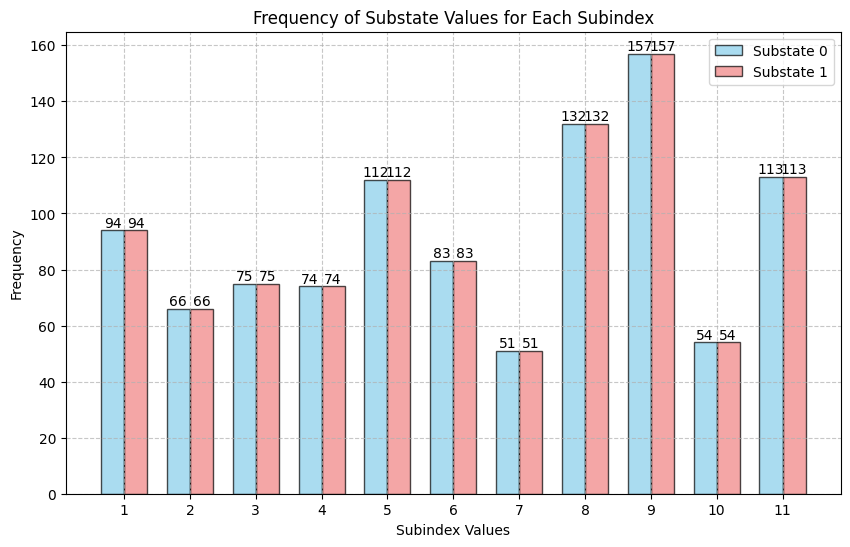

In [10]:
# Group by subindex and count occurrences of 0 and 1 in substate
subindex_values, substate_counts = np.unique(mat_data['subindex'], return_counts=True)
substate_0_counts = []
substate_1_counts = []

for subindex_value in subindex_values:
    substate_values_for_subindex = mat_data['substate'][mat_data['subindex'] == subindex_value]
    substate_0_counts.append(np.sum(substate_values_for_subindex == 0))
    substate_1_counts.append(np.sum(substate_values_for_subindex == 1))

# Set up the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_0 = np.arange(len(subindex_values))
bar_positions_1 = bar_positions_0 + bar_width

ax.bar(bar_positions_0, substate_0_counts, width=bar_width, label='Substate 0', alpha=0.7, color='skyblue', edgecolor='black')
ax.bar(bar_positions_1, substate_1_counts, width=bar_width, label='Substate 1', alpha=0.7, color='lightcoral', edgecolor='black')

# Add count annotations on top of each bar
for x, y in zip(bar_positions_0, substate_0_counts):
    ax.text(x, y + 0.1, str(y), ha='center', va='bottom')

for x, y in zip(bar_positions_1, substate_1_counts):
    ax.text(x, y + 0.1, str(y), ha='center', va='bottom')

ax.set_xticks(bar_positions_0 + bar_width / 2)
ax.set_xticklabels(subindex_values)
ax.set_xlabel('Subindex Values')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Substate Values for Each Subindex')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)

plt.show()


# Basic Statistical Overview of the EEG data

## State-specific Analysis: Mean and Standard Deviation of EEG Channels for 'Alert' and 'Drowsy' States

In [11]:
# Extracting individual components from the dataset
EEGsamples = data['EEGsample']
substates = data['substate'].ravel()  # Flatten the array

In [12]:
# Calculating means and standard deviations for each channel in both states

#Alert States
mean_alert = np.mean(EEGsamples[substates == 0], axis=(0, 2))
std_alert = np.std(EEGsamples[substates == 0], axis=(0, 2))

#Drowsy States
mean_drowsy = np.mean(EEGsamples[substates == 1], axis=(0, 2))
std_drowsy = np.std(EEGsamples[substates == 1], axis=(0, 2))

In [13]:
# Creating a DataFrame for easy viewing
stats_df = pd.DataFrame({
    'Channel': range(1, 31),
    'Mean_Alert': mean_alert,
    'Std_Alert': std_alert,
    'Mean_Drowsy': mean_drowsy,
    'Std_Drowsy': std_drowsy
})

In [14]:
stats_df  

Channel  Mean_Alert  Std_Alert  Mean_Drowsy  Std_Drowsy
0         1    0.120450  17.630071    -0.163686   10.802148
1         2    0.082160  17.209800    -0.163763   12.170468
2         3    0.052289   9.635932    -0.061430    9.706984
3         4    0.002035  30.798487    -0.113082   11.617223
4         5    0.022715   9.642534    -0.159155   11.707889
5         6    0.021788  26.476227    -0.154311   17.197473
6         7    0.019232  12.678096    -0.126242    9.635353
7         8    0.046900   8.752803    -0.070030    9.094665
8         9    0.023307   9.758593    -0.130595   11.230886
9        10    0.017935   9.891951    -0.138523   12.140691
10       11    0.026675  10.078026    -0.140926   11.493215
11       12    0.025204   9.419806    -0.115374    9.258657
12       13    0.030227   8.676220     0.289249  125.220203
13       14   -0.003453   9.422395    -0.105336   10.629389
14       15    0.020169   9.812209    -0.135267   11.993222
15       16    0.006739   9.497671    -0.118931   10.848385
16       17    0.019268   9.657509    -0.100339   13.435700
17       18    0.017605   8.470344    -0.022570   24.811520
18       19   -0.004788   9.078733    -0.100146   10.261368
19       20    0.019624   9.308660    -0.128844   11.225245
20       21   -0.007867   9.224565    -0.103152   10.433308
21       22    0.021766   8.139648    -0.056785    7.689594
22       23    0.007225   7.684455    -0.060255    8.109360
23       24   -0.003592   8.780666    -0.096036    9.909463
24       25    0.019598   9.051293    -0.118028   10.804096
25       26    0.010883   8.877545    -0.107124    9.976398
26       27    0.033979   7.612370    -0.062159    8.179160
27       28    0.010209   8.213521    -0.026352   10.028616
28       29   -0.011278   8.012658    -0.017755    9.505379
29       30    0.016158   8.402189    -0.030039    9.875275

## EEG Channel Statistics Across Subjects and Timepoints

In [15]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel
for channel_index in range(num_channels):
    print("Channel {}: Mean: {:.4f}, Std: {:.4f}, Min: {:.4f}, Max: {:.4f}".format(
        channel_index + 1, mean_values[channel_index], std_values[channel_index],
        min_values[channel_index], max_values[channel_index]
    ))

Channel 1: Mean: -0.0216, Std: 14.6210, Min: -573.2365, Max: 871.9078
Channel 2: Mean: -0.0408, Std: 14.9052, Min: -1299.3223, Max: 911.1531
Channel 3: Mean: -0.0046, Std: 9.6717, Min: -208.1605, Max: 243.2860
Channel 4: Mean: -0.0555, Std: 23.2757, Min: -1302.3108, Max: 1795.5439
Channel 5: Mean: -0.0682, Std: 10.7254, Min: -259.1864, Max: 157.8684
Channel 6: Mean: -0.0663, Std: 22.3244, Min: -1914.6017, Max: 1294.2410
Channel 7: Mean: -0.0535, Std: 11.2602, Min: -496.5066, Max: 754.2102
Channel 8: Mean: -0.0116, Std: 8.9256, Min: -257.1262, Max: 178.2628
Channel 9: Mean: -0.0536, Std: 10.5208, Min: -264.4460, Max: 358.2625
Channel 10: Mean: -0.0603, Std: 11.0738, Min: -170.1104, Max: 172.7116
Channel 11: Mean: -0.0571, Std: 10.8091, Min: -220.8742, Max: 281.4221
Channel 12: Mean: -0.0451, Std: 9.3398, Min: -249.3489, Max: 203.9866
Channel 13: Mean: 0.1597, Std: 88.7564, Min: -3195.4259, Max: 3430.9080
Channel 14: Mean: -0.0544, Std: 10.0442, Min: -259.9218, Max: 369.9024
Channel 15: 

# Visualization of EEG waveforms

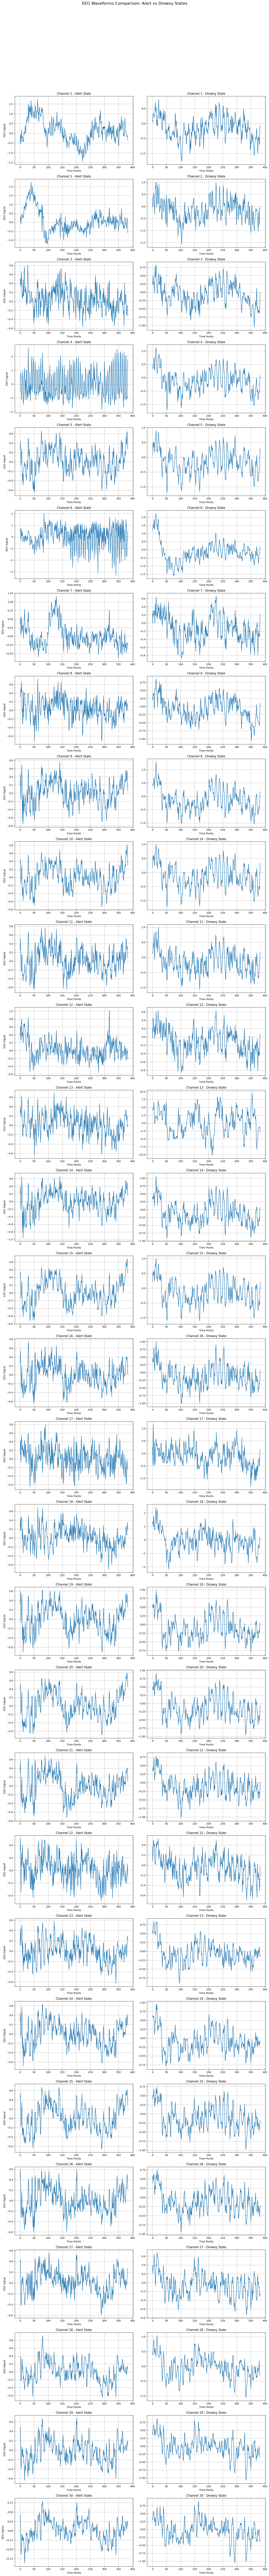

In [16]:
# Selecting all channels for visualization
all_channels = list(range(1, 31))

# Creating plots
fig, axes = plt.subplots(nrows=len(all_channels), ncols=2, figsize=(15, 5 * len(all_channels)))
fig.suptitle('EEG Waveforms Comparison: Alert vs Drowsy States', fontsize=16)

# Plotting for each channel
for i, channel in enumerate(all_channels):
    
    
    # Alert state
    axes[i, 0].plot(EEGsamples[substates == 0][:, channel - 1, :].mean(axis=0))
    axes[i, 0].set_title(f'Channel {channel} - Alert State')
    axes[i, 0].set_xlabel('Time Points')
    axes[i, 0].set_ylabel('EEG Signal')
    axes[i, 0].grid(True)  # Add grid lines

    
    # Drowsy state
    axes[i, 1].plot(EEGsamples[substates == 1][:, channel - 1, :].mean(axis=0))
    axes[i, 1].set_title(f'Channel {channel} - Drowsy State')
    axes[i, 1].set_xlabel('Time Points')
    axes[i, 1].grid(True)  # Add grid lines

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


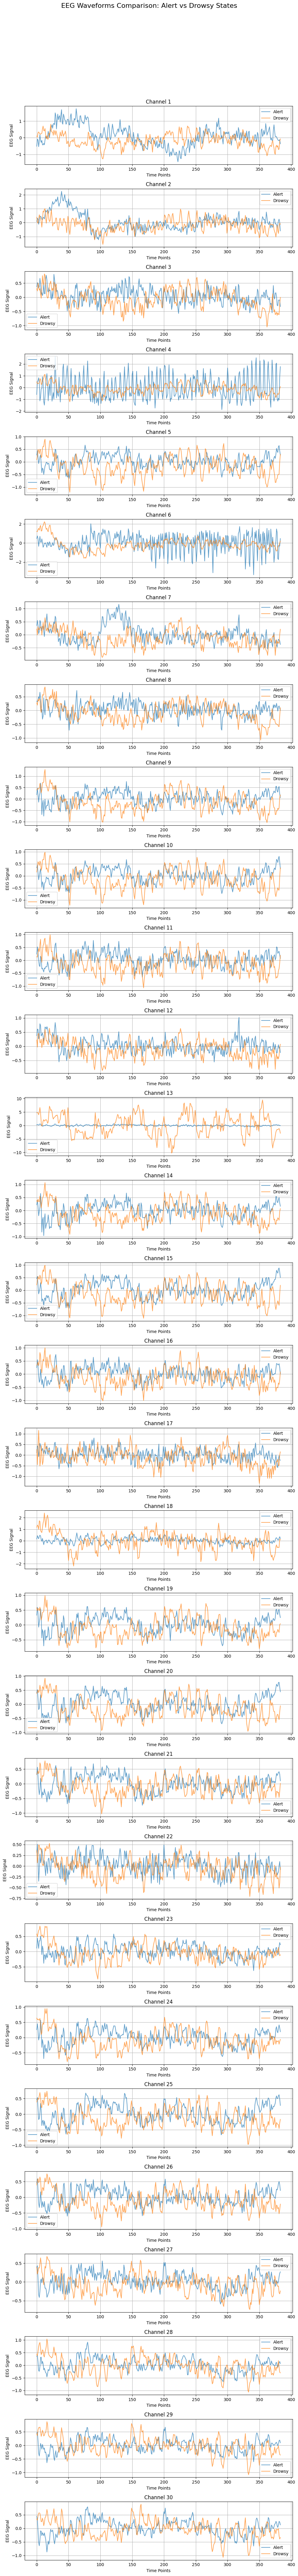

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the EEGsamples and substates defined

# Selecting all channels for visualization
all_channels = list(range(1, 31))

# Creating plots
fig, axes = plt.subplots(nrows=len(all_channels), ncols=1, figsize=(10, 3 * len(all_channels)))
fig.suptitle('EEG Waveforms Comparison: Alert vs Drowsy States', fontsize=16)

# Plotting for each channel
for i, channel in enumerate(all_channels):
    # Alert state
    alert_mean = EEGsamples[substates == 0][:, channel - 1, :].mean(axis=0)
    axes[i].plot(alert_mean, label='Alert', alpha=0.7)

    # Drowsy state
    drowsy_mean = EEGsamples[substates == 1][:, channel - 1, :].mean(axis=0)
    axes[i].plot(drowsy_mean, label='Drowsy', alpha=0.7)

    axes[i].set_title(f'Channel {channel}')
    axes[i].set_xlabel('Time Points')
    axes[i].set_ylabel('EEG Signal')
    axes[i].legend()

    # Add grid
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

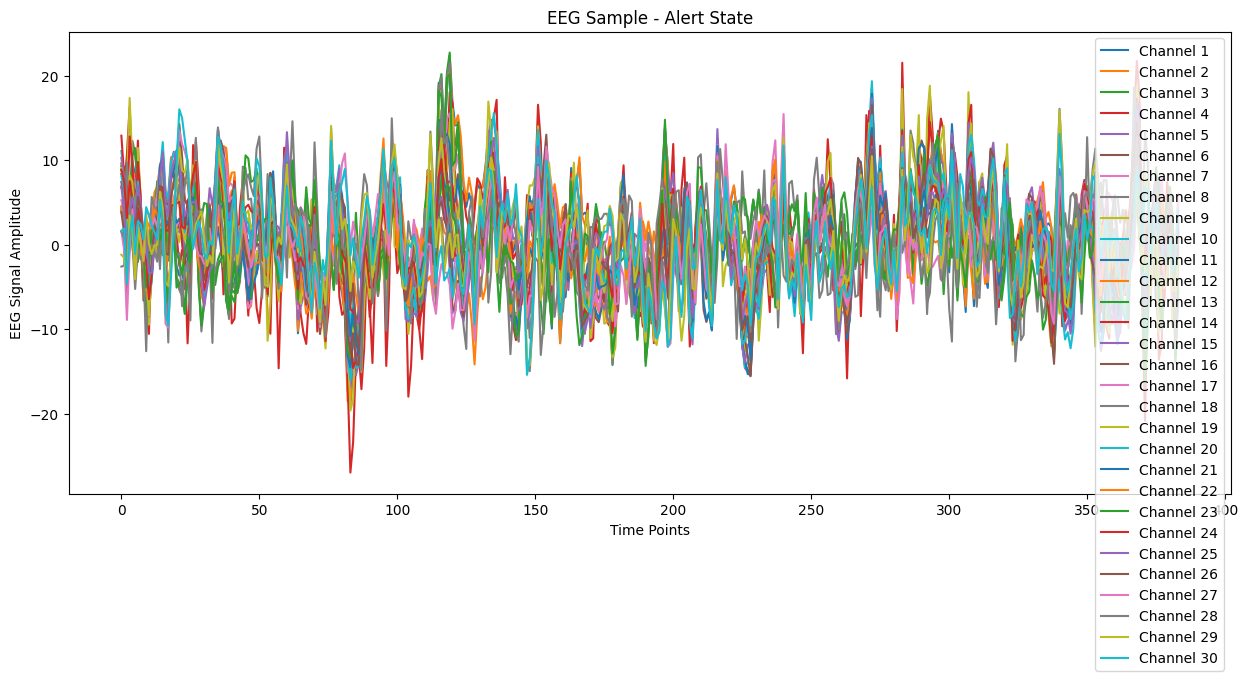

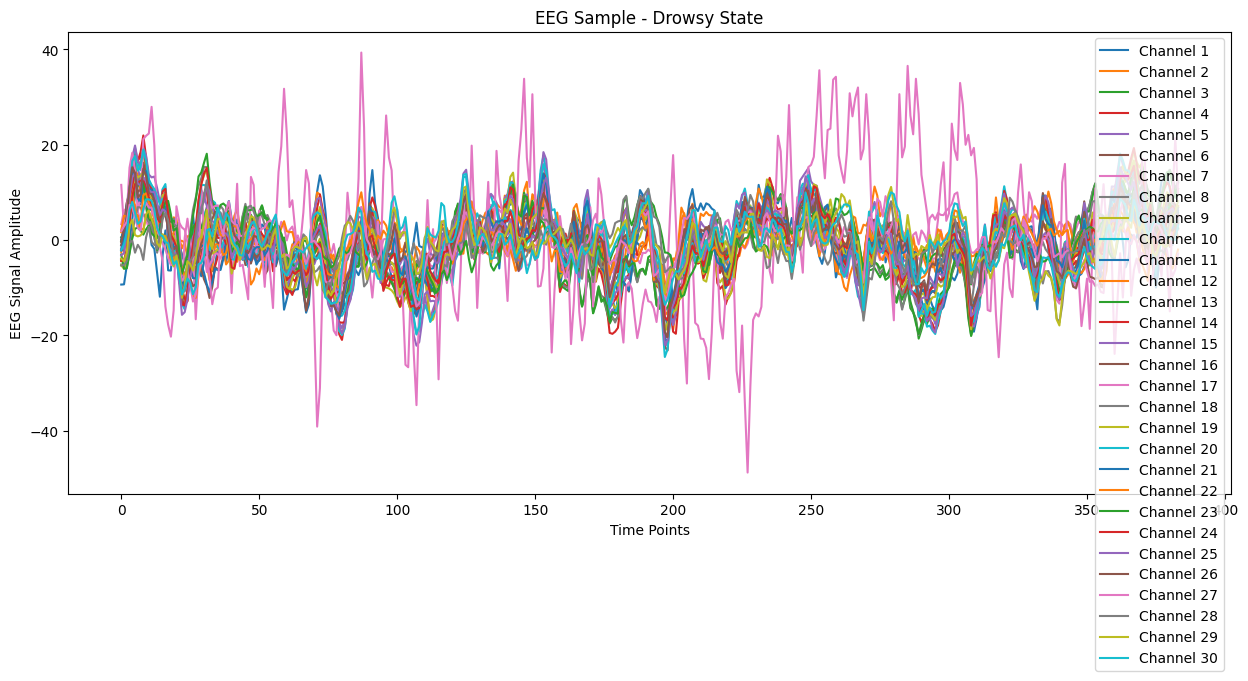

In [21]:
# Function to plot EEG signals for a given sample
def plot_eeg_sample(eeg_data, sample_index, title):
    plt.figure(figsize=(15, 6))
    for i in range(eeg_data.shape[1]):
        plt.plot(eeg_data[sample_index, i, :], label=f'Channel {i+1}')
    plt.title(title)
    plt.xlabel('Time Points')
    plt.ylabel('EEG Signal Amplitude')
    plt.legend()
    plt.show()

# Find the index of the first occurrence of 0 (alert state)
sample_alert_index = list(substate).index(0)

# Find the index of the first occurrence of 1 (drowsy state)
sample_drowsy_index = list(substate).index(1)

# Plot EEG samples for alert and drowsy states
plot_eeg_sample(eeg_samples, sample_alert_index, 'EEG Sample - Alert State')
plot_eeg_sample(eeg_samples, sample_drowsy_index, 'EEG Sample - Drowsy State')




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_subjects = 11  # Assuming you have 11 subjects
num_channels = 30  # Assuming you have 30 channels

for subject in range(num_subjects):
    # Create a figure for each subject
    fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(10, 3 * num_channels))
    fig.suptitle(f'EEG Data for Subject {subject + 1}', fontsize=16)

    for channel in range(num_channels):
        # Extract data for the current channel and subject
        channel_data = EEGsamples[subject, channel, :]

        # Plotting
        axes[channel].plot(channel_data, label=f'Channel {channel + 1}')
        axes[channel].set_title(f'Channel {channel + 1}')
        axes[channel].set_xlabel('Time Points')
        axes[channel].set_ylabel('EEG Signal')
        axes[channel].legend()
        axes[channel].grid(True)

    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

num_subjects = 11  # Assuming you have 11 subjects
num_channels = 30  # Assuming you have 30 channels

for subject in range(num_subjects):
    # Create a figure for each subject
    fig, axes = plt.subplots(nrows=num_channels, ncols=1, figsize=(10, 3 * num_channels))
    fig.suptitle(f'EEG Data for Subject {subject + 1}', fontsize=16)

    for channel in range(num_channels):
        # Extract data for the current channel and subject
        channel_data = EEGsamples[subject, channel, :]

        # Plotting
        axes[channel].plot(channel_data, label=f'Channel {channel + 1}')
        axes[channel].set_title(f'Channel {channel + 1}')
        axes[channel].set_xlabel('Time Points')
        axes[channel].set_ylabel('EEG Signal')
        axes[channel].legend()
        axes[channel].grid(True)

    plt.tight_layout()

    # Save the figure as an image file (you can change the file format and filename as needed)
    fig.savefig(f'eeg_data_subject_{subject + 1}.png')

    # Close the figure to free up resources
    plt.close()

# Displaying all saved figures
plt.show()


In [ ]:
import numpy as np

# Summary statistics for the entire EEGsamples dataset
mean_value = np.mean(EEGsamples)
std_value = np.std(EEGsamples)
min_value = np.min(EEGsamples)
max_value = np.max(EEGsamples)

print(f"Overall Mean: {mean_value}, Std: {std_value}, Min: {min_value}, Max: {max_value}")


In [ ]:
import matplotlib.pyplot as plt

# Example: Subject 1, Channel 1
subject = 0
channel = 0
plt.plot(EEGsamples[subject, channel, :])
plt.title(f'EEG Data for Subject {subject+1}, Channel {channel+1}')
plt.xlabel('Time Points')
plt.ylabel('EEG Signal')
plt.show()


In [ ]:
import pandas as pd

# Display data for Subject 1 across all channels and first 10 time points
data_slice = EEGsamples[subject, :, :10]
df = pd.DataFrame(data_slice)
print(df)


In [ ]:
# Print the value for Subject 1, Channel 1, at the first time point
print("Specific value:", EEGsamples[subject, channel, 0])


In [ ]:
import numpy as np

# Assuming you have 'eeg_samples' as your EEG data
# Assuming 'num_channels' is defined somewhere in your code

# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel in a structured format
print("Basic Statistics for EEG Channels")
print("---------------------------------")

for channel_index in range(num_channels):
    print(f"\nChannel {channel_index + 1}:")
    print(f"  Mean:              {mean_values[channel_index]:.4f}")
    print(f"  Standard Deviation: {std_values[channel_index]:.4f}")
    print(f"  Minimum Value:     {min_values[channel_index]:.4f}")
    print(f"  Maximum Value:     {max_values[channel_index]:.4f}")
    print("-" * 30)


In [ ]:
import numpy as np
from prettytable import PrettyTable

# Assuming you have 'eeg_samples' as your EEG data
# Assuming 'num_channels' is defined somewhere in your code

# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a table for basic statistics of EEG channels
table = PrettyTable()
table.field_names = ["Channel", "Mean", "Std Dev", "Min", "Max"]

for channel_index in range(num_channels):
    table.add_row([
        channel_index + 1,
        f"{mean_values[channel_index]:.4f}",
        f"{std_values[channel_index]:.4f}",
        f"{min_values[channel_index]:.4f}",
        f"{max_values[channel_index]:.4f}"
    ])

# Print the table
print("Basic Statistics for EEG Channels")
print(table)


In [ ]:
import numpy as np
from tabulate import tabulate

# Assuming you have 'eeg_samples' as your EEG data
# Assuming 'num_channels' is defined somewhere in your code

# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

# Print the table
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="pretty"))


In [ ]:
import numpy as np
from tabulate import tabulate

# Assuming you have 'eeg_samples' as your EEG data
# Assuming 'num_channels' is defined somewhere in your code

# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Create a list of dictionaries for each channel's statistics
channel_stats = [
    {
        "Channel": channel_index + 1,
        "Mean": f"{mean_values[channel_index]:.4f}",
        "Std Dev": f"{std_values[channel_index]:.4f}",
        "Min": f"{min_values[channel_index]:.4f}",
        "Max": f"{max_values[channel_index]:.4f}"
    }
    for channel_index in range(num_channels)
]

# Print the table with a grid format
print("Basic Statistics for EEG Channels")
print(tabulate(channel_stats, headers="keys", tablefmt="grid"))
